In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")

Data Cleaning

In [7]:
sports_cars = pd.read_csv("/content/Sport car price.csv")


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
sports_cars.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [10]:
sports_cars.shape

(1007, 8)

In [11]:
sports_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [12]:
# Remove the comma and convert to numeric
sports_cars['Price (in USD)'] = sports_cars['Price (in USD)'].apply(lambda x : x.replace(',', ''))
sports_cars.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4,710,568,2.7,298000


In [13]:
sports_cars['Engine Size (L)'].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'Electric', '6.5', '3.7', 'Electric Motor',
       '2.5', '1.5 + Electric', '6.8', '8.4', nan, '6.6', '7', '1.7',
       '3.3', '-', '6.7', '1.8', 'Electric (tri-motor)', '5.5',
       'Electric (93 kWh)', 'Electric (100 kWh)', 'Hybrid (4.0)', '4.6',
       '3.6', '1.5', 'Hybrid', '5.7', '2.0 (Electric)', '4.0 (Hybrid)',
       '0', '6.4', '6.3', '2.3'], dtype=object)

In [14]:
def apply_lambda(col, l):
    sports_cars[col] = sports_cars[col].apply(l)

In [15]:
# Remove redundant signs in values (+, >, -)
def replace_string(col,str1,str2):
    sports_cars[col] = sports_cars[col].apply(lambda x : str(x).replace(str1,'').replace(str2,''))

In [16]:
sports_cars['Electric'] = sports_cars['Engine Size (L)'].copy()
apply_lambda('Electric', lambda x : 'No' if 'Electric' not in str(x) else 'Yes')
sports_cars['Electric'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
# Whether the car is hybrid
sports_cars['Hybrid'] = sports_cars['Engine Size (L)'].copy()
apply_lambda('Hybrid', lambda x : 'No' if 'Hybrid' not in str(x) else 'Yes')
sports_cars['Hybrid'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
# Remove the electric and hybrid values from Engine size
apply_lambda('Engine Size (L)', lambda x : x if len(str(x)) == 1 else re.search('\d{1}\.\d{1}', str(x)))
apply_lambda('Engine Size (L)', lambda x : x.group() if type(x) == re.Match else x)
replace_string('Engine Size (L)','-','')
sports_cars['Engine Size (L)'].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'None', '6.5', '3.7', '2.5', '1.5', '6.8',
       '8.4', '6.6', '7', '1.7', '3.3', '', '6.7', '1.8', '5.5', '4.0',
       '4.6', '3.6', '5.7', '2.0', '0', '6.4', '6.3', '2.3'], dtype=object)

In [19]:
replace_string('Horsepower',',','+')

In [20]:
replace_string('Torque (lb-ft)','-','+')
replace_string('Torque (lb-ft)',',','')

In [21]:
replace_string('0-60 MPH Time (seconds)','<','+')
sports_cars['0-60 MPH Time (seconds)'].unique()

array(['4', '2.8', '3', '3.2', '2.7', '3.1', '3.8', '3.5', '2.5', '2.4',
       '5.4', '4.4', '4.8', '4.7', '3.6', '4.1', '1.85', '4.5', '3.3',
       '3.9', '4.2', '3.4', '5.1', '4.3', '2.9', '5', '5.3', '4.9', '6.5',
       '3.7', '1.95', '1.9', '1.98', '2.6', '2.3', '4.6', ' 1.9', '1.8',
       '2.1', '5.2', '2.2', '6.4', '2'], dtype=object)

In [22]:
sports_cars.iloc[:,3:8] = sports_cars.iloc[:,3:8].apply(pd.to_numeric, errors = 'coerce')
sports_cars.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Electric,Hybrid
0,Porsche,911,2022,3.00,379,331.00,4.00,101200,No,No
1,Lamborghini,Huracan,2021,5.20,630,443.00,2.80,274390,No,No
2,Ferrari,488 GTB,2022,3.90,661,561.00,3.00,333750,No,No
3,Audi,R8,2022,5.20,562,406.00,3.20,142700,No,No
4,McLaren,720S,2021,4.00,710,568.00,2.70,298000,No,No


**Exploratory Data Analysis**

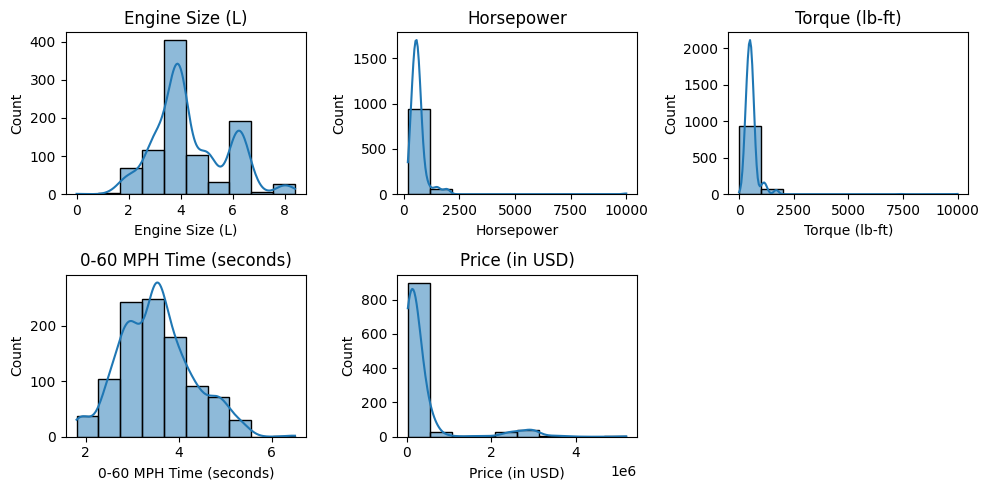

In [23]:
numerical_features = ['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)','0-60 MPH Time (seconds)','Price (in USD)']
plt.figure(figsize=(10, 5))
for feature in numerical_features:
    plt.subplot(2, 3, numerical_features.index(feature) + 1)
    sns.histplot(data=sports_cars[feature], bins=10, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

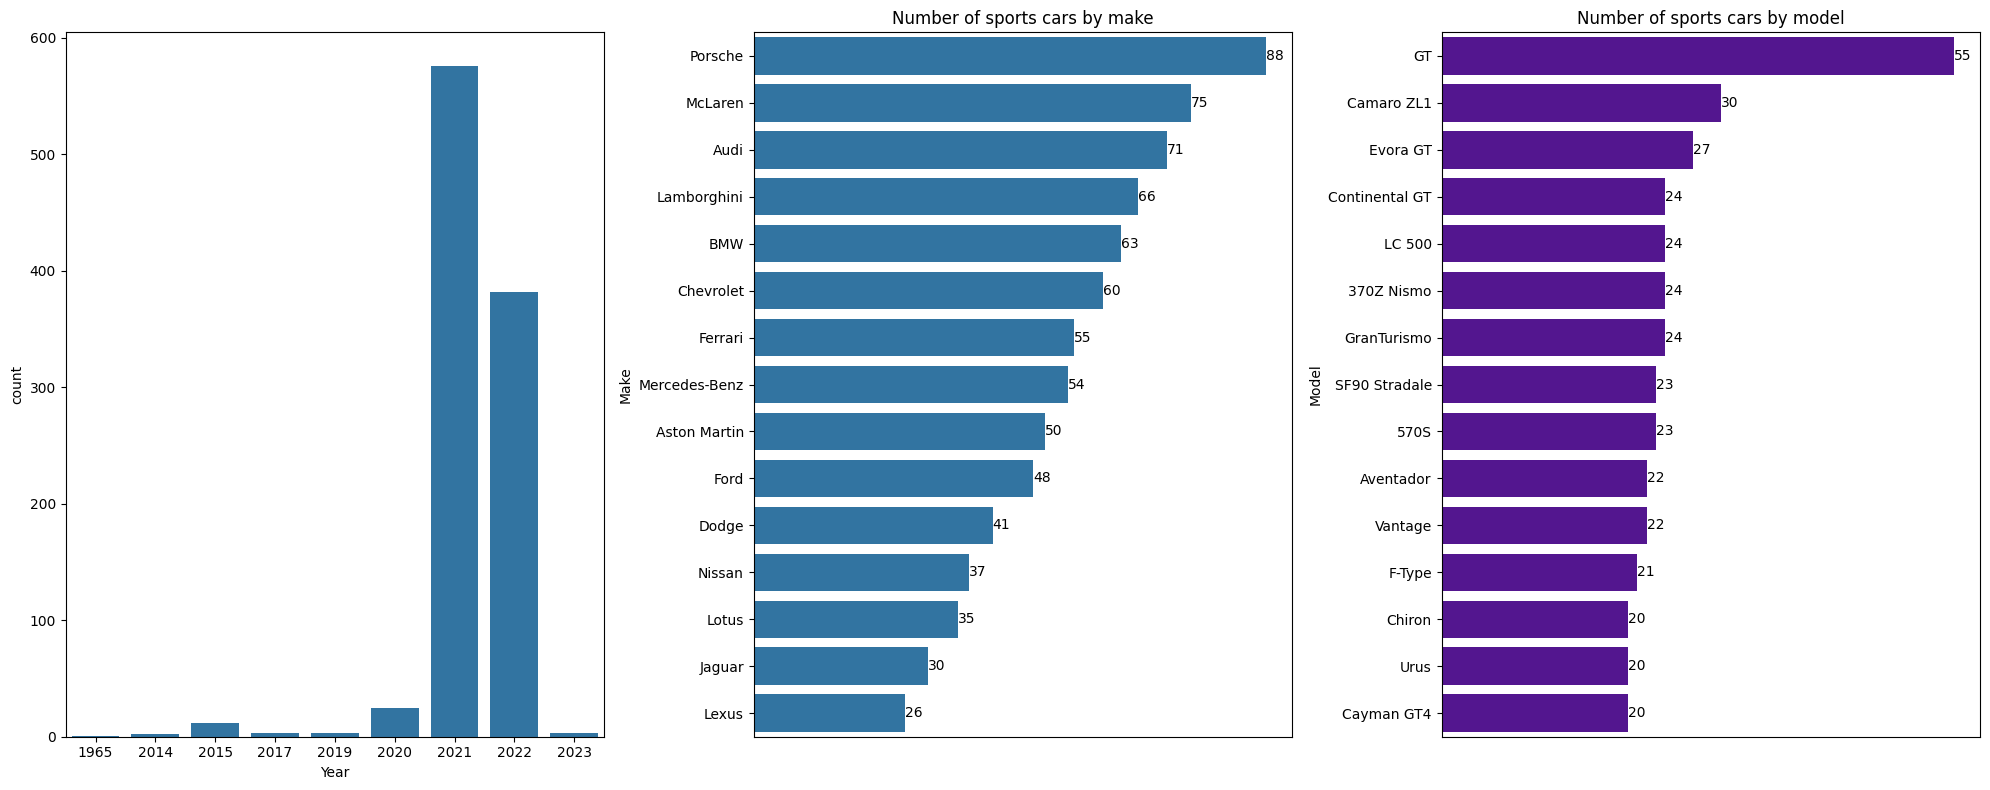

In [24]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.countplot(x = 'Year',data = sports_cars)

def horizontal_plot(col):
    df = sports_cars[col].value_counts().head(15)
    ax = sns.barplot(x = df.values,y = df.index)
    ax.set(xticklabels=[],title = f'Number of sports cars by {col.split()[1].lower()}',ylabel = col.split()[1])
    ax.tick_params(bottom=False)

    for bars in ax.containers:
        ax.bar_label(bars)
plt.subplot(1,3,2)
#adding colormap
sns.set_palette('plasma')
horizontal_plot('Car Make')

plt.subplot(1,3,3)
#adding colormap
sns.set_palette('cividis')
horizontal_plot('Car Model')


plt.tight_layout()
plt.show()

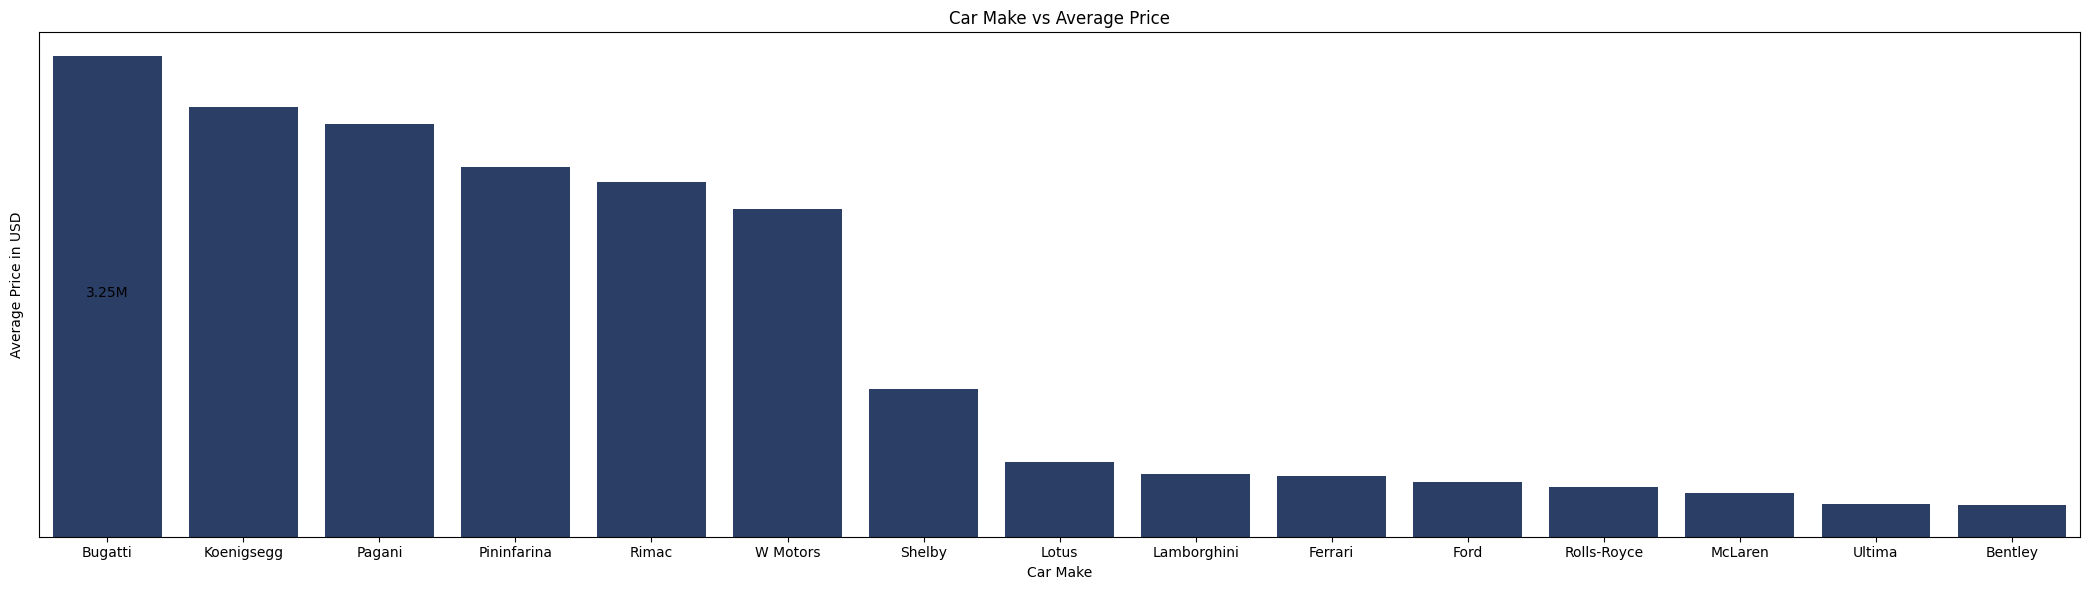

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [25]:
def vertical_plot(col):
    plt.figure(figsize=(21, 6))
    df = pd.DataFrame(sports_cars.groupby([col]).agg({'Price (in USD)': ['mean', 'count']}))
    df = df.sort_values(by=('Price (in USD)','mean'), ascending=False).head(15)
    ax = sns.barplot(data=df, x=df.index, y=('Price (in USD)','mean'))
    ax.set(yticklabels = [], title = f'{col} vs Average Price', ylabel='Average Price in USD')
    ax.tick_params(left=False)


    for i in range(0,15):
        if df['Price (in USD)']['mean'][i] > 999999:
            mean = str(round(df['Price (in USD)']['mean'][i]/1000000,2)) + 'M'
        else:
            mean = str(round(df['Price (in USD)']['mean'][i]/1000,2)) + 'K'
        ax.text(i, df['Price (in USD)']['mean'][i]/2, mean ,ha='center')
        plt.tight_layout()
        sns.set_palette('plasma')
        plt.show()

vertical_plot('Car Make')

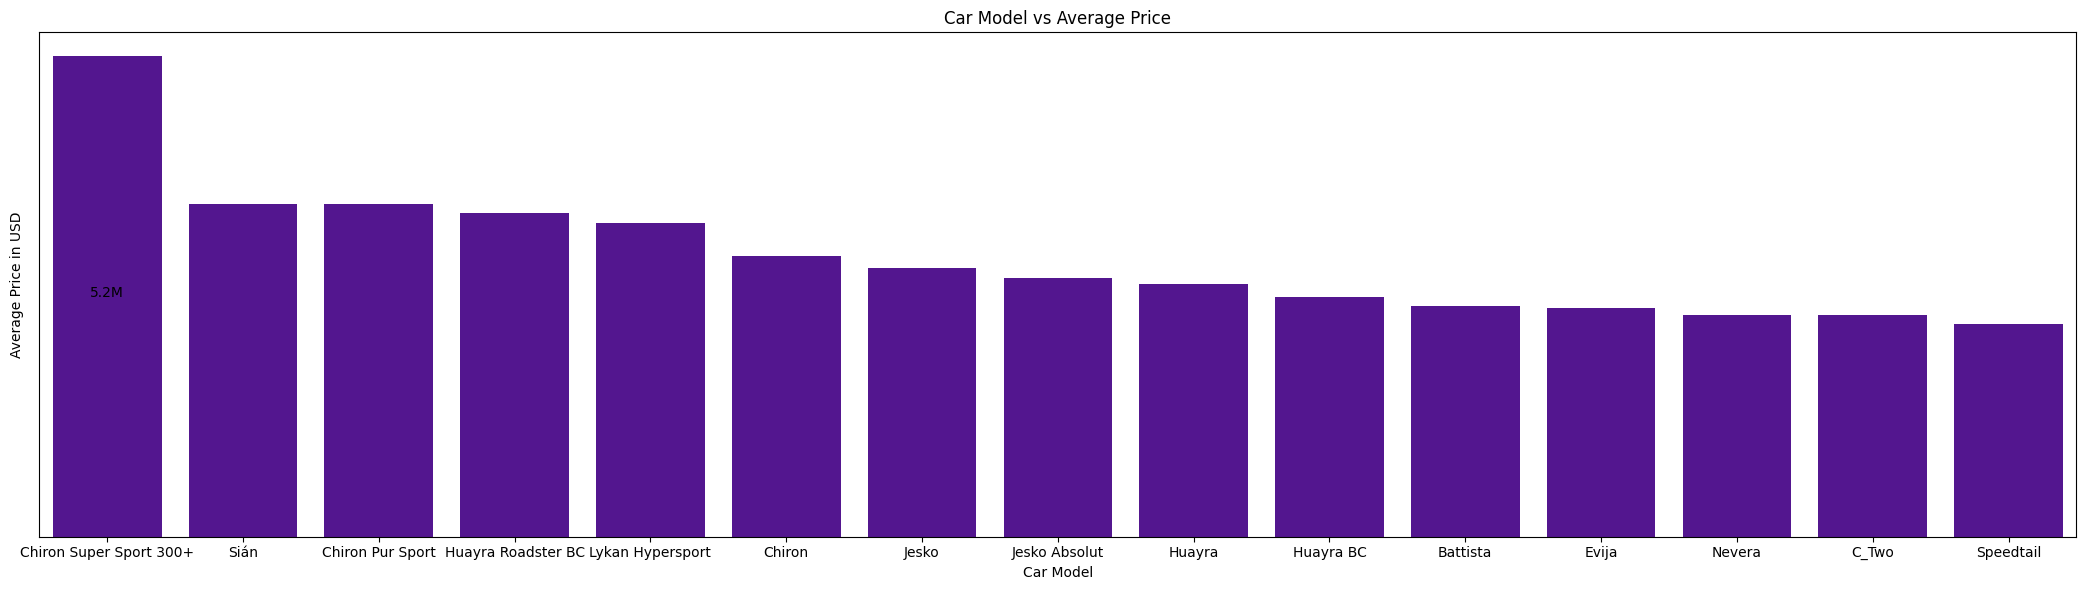

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [26]:
vertical_plot('Car Model')

<Axes: xlabel='Hybrid', ylabel='Price (in USD)'>

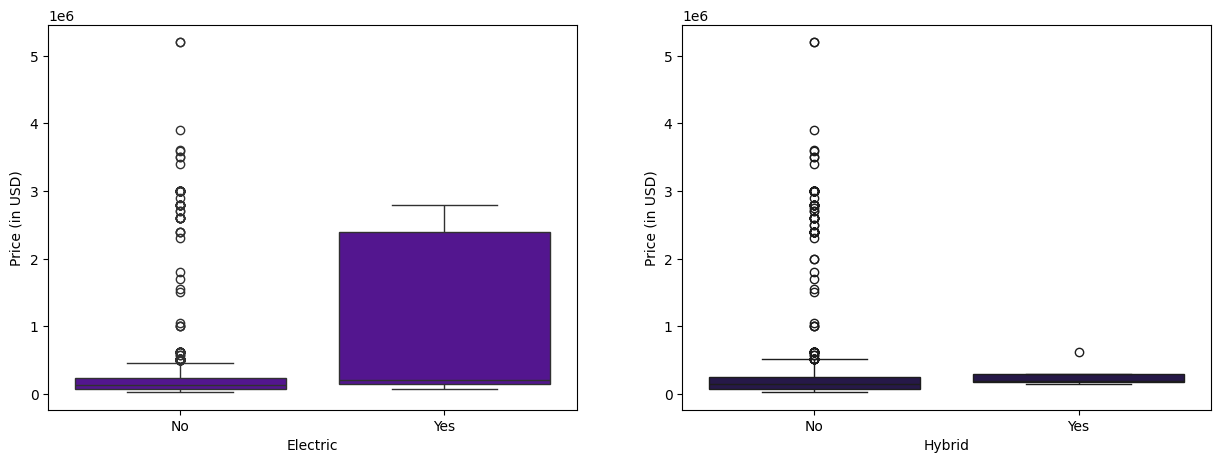

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.set_palette('magma')
sns.boxplot(x = sports_cars['Electric'], y = sports_cars['Price (in USD)'])

plt.subplot(1,2,2)
sns.set_palette('magma')
sns.boxplot(x = sports_cars['Hybrid'], y = sports_cars['Price (in USD)'])

In [29]:
sports_cars['Electric'].value_counts()

Electric
No     963
Yes     44
Name: count, dtype: int64

In [30]:
sports_cars['Hybrid'].value_counts()

Hybrid
No     1003
Yes       4
Name: count, dtype: int64

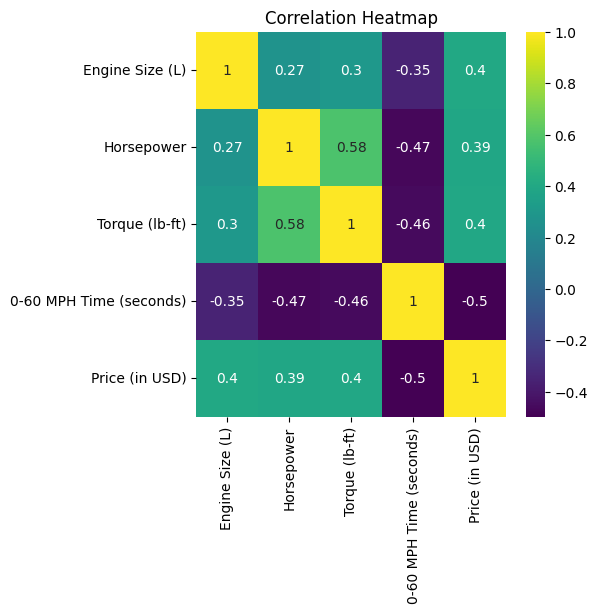

In [31]:
plt.figure(figsize=(5, 5))
sns.heatmap(sports_cars[numerical_features].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

Preprocessing and Regression

In [32]:
sports_cars['Car Model'].value_counts(ascending = True)[0:15]

Car Model
Mustang             1
AMG C 63 S          1
Fenyr SuperSport    1
RS                  1
M4 Coupe            1
CLS63 AMG           1
SLC 43              1
Sián                1
Speedtail           1
Camaro SS 1LE       1
Jesko Absolut       1
Viper ACR           1
C 63 S              1
Corvette Z06        1
A110                1
Name: count, dtype: int64

In [33]:
sports_cars['Car Make'].value_counts(ascending = True)[0:15]

Car Make
Ultima           1
Polestar         1
Mazda            1
Ariel            1
Shelby           1
Alpine           1
Kia              1
Pininfarina      2
TVR              2
W Motors         3
Subaru           3
Toyota           5
Rolls-Royce     10
Mercedes-AMG    11
Pagani          12
Name: count, dtype: int64

In [34]:
# Grouping the car make with less than 10 occurences
make = sports_cars['Car Make'].value_counts().loc[lambda x: x<10]
apply_lambda('Car Make', lambda x : 'Others' if x in make else x)

In [35]:
sports_cars = sports_cars.drop(['Car Model', 'Year', 'Hybrid'], axis=1)
sports_cars.head()

,Car Make,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Electric
0,Porsche,3.00,379,331.00,4.00,101200,No
1,Lamborghini,5.20,630,443.00,2.80,274390,No
2,Ferrari,3.90,661,561.00,3.00,333750,No
3,Audi,5.20,562,406.00,3.20,142700,No
4,McLaren,4.00,710,568.00,2.70,298000,No


In [36]:
from sklearn.model_selection import train_test_split

x = sports_cars.drop(['Price (in USD)'], axis = 1)
y = sports_cars['Price (in USD)']

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

In [37]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

cat_attribs = list(sports_cars.iloc[:, [0, 6]])
num_attribs = list(sports_cars.iloc[:, 1:5])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('one_hot_encoder', OneHotEncoder(sparse=False))
])

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('cat_pipeline', cat_pipeline),
    ('num_pipeline', num_pipeline),
])

In [38]:
x_train_prepared = full_pipeline.fit_transform(x_train)
x_test_prepared = full_pipeline.fit_transform(x_test)

In [39]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train_prepared,y_train)
lin_train_pred = lin_reg.predict(x_train_prepared)
lin_test_pred = lin_reg.predict(x_test_prepared)

print('RMSE train data: %.3f' % (
np.sqrt(mean_squared_error(y_train,lin_train_pred))))
print('R2 train data: %.3f' % (
r2_score(y_train,lin_train_pred)))

RMSE train data: 229526.296
R2 train data: 0.898


In [41]:
lin_scores = cross_val_score(lin_reg, x_train_prepared, y_train, scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [145353.88665242 144157.13904461 152078.10037579 398060.10629323
  91823.85939918 277920.75761207 427867.12290203 157275.38171469
 254921.21468674 197684.39880635]
Mean: 224714.1967487115
Standard deviation: 107733.59001898085


In [42]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train_prepared,y_train)
forest_train_pred = forest.predict(x_train_prepared)
forest_test_pred = forest.predict(x_test_prepared)

print('RMSE train data: %.3f' % (
np.sqrt(mean_squared_error(y_train,forest_train_pred))))
print('R2 train data: %.3f' % (
r2_score(y_train,forest_train_pred)))

RMSE train data: 74416.672
R2 train data: 0.989


In [43]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
sgd_reg.fit(x_train_prepared,y_train)
sgd_train_pred = sgd_reg.predict(x_train_prepared)
sgd_test_pred = sgd_reg.predict(x_test_prepared)

print('RMSE train data: %.3f' % (
np.sqrt(mean_squared_error(y_train,sgd_train_pred))))
print('R2 train data: %.3f' % (
r2_score(y_train,sgd_train_pred)))

RMSE train data: 233627.266
R2 train data: 0.895


In [44]:
sgd_scores = cross_val_score(sgd_reg, x_train_prepared, y_train, scoring = "neg_mean_squared_error", cv=10)
sgd_rmse_scores = np.sqrt(-sgd_scores)
display_scores(sgd_rmse_scores)

Scores: [181807.77772198 160327.05337196 193718.79241616 396278.76988813
  97065.66463416 274069.96886241 425799.97318671 151457.13474324
 271313.98658115 216947.62005161]
Mean: 236878.67414575125
Standard deviation: 100829.62089884015


In [45]:
x_test_prepared = full_pipeline.transform(x_test)
final_predictions = lin_reg.predict(x_test_prepared)

print('RMSE test data: %.3f' % (
np.sqrt(mean_squared_error(y_test,final_predictions))))
print('R2 test data: %.3f' % (
r2_score(y_test,final_predictions)))

RMSE test data: 334474.820
R2 test data: 0.821
